# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [ ]:
import pandas as pd
import numpy as np

iowa = pd.read_csv('/Users/steveferenzi/Desktop/UVA MSDS/courses/5030 Understanding Uncertainty/assignments/1/data/iowa.csv')
iowa.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


Definition of the most profitable item is the greatest of summing ["Bottles Sold" x ("State Bottle Retail" - "State Bottle Cost")] for each item. "Sales" is not a good measure because it doesn't capture the cost of the stores purchasing the bottles (pre-retail). Therefore we must subtract that cost from the retail per bottle to represent the profit.

In [ ]:
topresults = iowa.groupby('Category Name').apply(lambda x: (x['Bottles Sold'].sum() * (x['State Bottle Retail'].sum() - x['State Bottle Cost'].sum()))).nlargest(10)
topresults

/var/folders/_j/g3w6_07d0b9gfphnq_607h_40000gn/T/ipykernel_59138/700015443.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  topresults = iowa.groupby('Category Name').apply(lambda x: (x['Bottles Sold'].sum() * (x['State Bottle Retail'].sum() - x['State Bottle Cost'].sum()))).nlargest(10)


Category Name
AMERICAN VODKAS              1.525268e+10
CANADIAN WHISKIES            1.482080e+10
WHISKEY LIQUEUR              7.163396e+09
STRAIGHT BOURBON WHISKIES    5.847513e+09
SPICED RUM                   3.292117e+09
IMPORTED VODKAS              1.991398e+09
VODKA 80 PROOF               1.825747e+09
BLENDED WHISKIES             1.590837e+09
100% AGAVE TEQUILA           1.476932e+09
TENNESSEE WHISKIES           1.281142e+09
dtype: float64

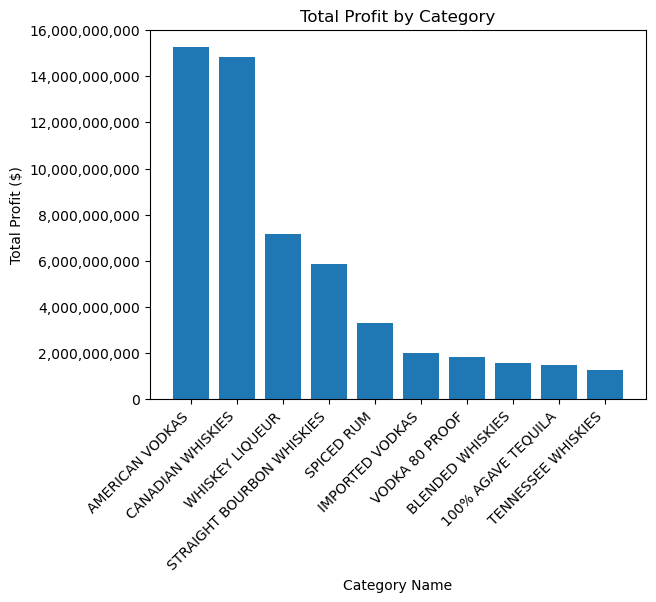

In [ ]:
import matplotlib.pyplot as plt

plt.bar(topresults.index, topresults.values)
plt.xlabel('Category Name')
plt.ylabel('Total Profit ($)')
plt.title('Total Profit by Category')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=45, ha='right')

plt.show()

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers.
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [ ]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [ ]:
x - y           ## ValueError: operands could not be broadcast together with shapes (3,) (2,)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

x - y generates an error because x has a shape of three (3,) and y has a shape of two (2,). Subtraction element-by-element fails because the sizes don’t match.

In [ ]:
x.reshape(-1, 1) - y.reshape(1, -1)   # creates a 3x2 array with all combinations of differences


array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [ ]:
x.reshape(1, -1) - y.reshape(-1, 1)  # creates a 1x3 array minus a 2x1 array, which broadcasts to a 2x3 array

array([[-1,  1,  3],
       [-4, -2,  0]])

The second answer is a 2x3 array with the same values as the previous but transposed.

In [ ]:
## x.reshape(-1, 1) - y.reshape(1, -1) >> build rows by subtracting each y[j] from each x[i] -- Chat-assisted

x = np.array([1,3,5])
y = np.array([2,5])

result = []
for i in range(len(x)):
    row = []
    for j in range(len(y)):
        row.append(x[i] - y[j])     # produces np.int64 scalars
    result.append(row)

result = np.array(result)           # converts to 2D NumPy array

print(result)

[[-1 -4]
 [ 1 -2]
 [ 3  0]]


In [ ]:
## x.reshape(1, -1) - y.reshape(-1, 1) -- Chat-assisted

x = np.array([1,3,5])
y = np.array([2,5])

result = []
for i in range(len(y)):             # rows = len(y)
    row = []
    for j in range(len(x)):         # cols = len(x)
        row.append(x[j] - y[i])
    result.append(row)

result = np.array(result)           # converts to 2D NumPy array
print(result)

[[-1  1  3]
 [-4 -2  0]]


x.reshape(1, -1) performs two operations to shape x from a 1-D array ([1, 3, 5]) into a 2-D row vector with 1 row & 3 columns ([[1, 3, 5]])
    - first argument (1) converts it to 1 row
	- second argument (,-1) automatically determines the number of columns needed

x.reshape(-1, 1) performs two operations to shape x from a 1-D array ([1, 3, 5]) into a 2-D column vector with 3 rows and 1 column
    - first argument (-1) determines how many rows are needed based on the length of the array
	- second argument (,1) coverts it to 1 column

So:
	reshape(1, -1) makes x a row
	reshape(-1, 1) makes x a column

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

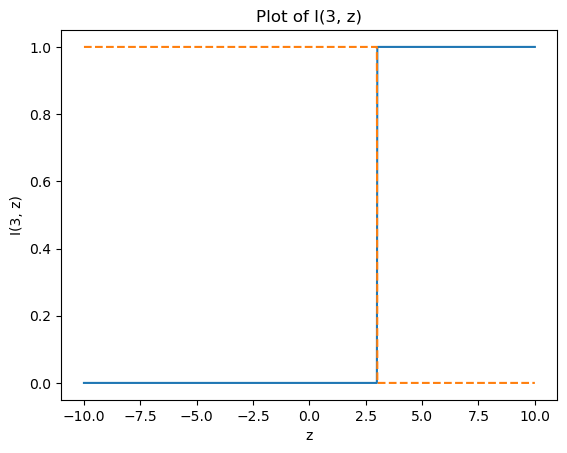

In [ ]:
import matplotlib.pyplot as plt

def I(x, z):   # returns 0 if x > z, 1 if x <= z
    return 0 if x > z else 1

z_values = np.linspace(-10, 10, 1000)

# Evaluate the function for each value of z
I_values = [I(3,z) for z in z_values]


# Plot the function
plt.plot(z_values, I_values)
plt.plot(z_values, 1 - np.array(I_values), label="1 - I(3,z)", linestyle="--")
plt.xlabel('z')
plt.ylabel('I(3, z)')
plt.title('Plot of I(3, z)')
plt.show()

Plotting 1 minus the indicator function alongside the indicator function itself shows that they are complements.

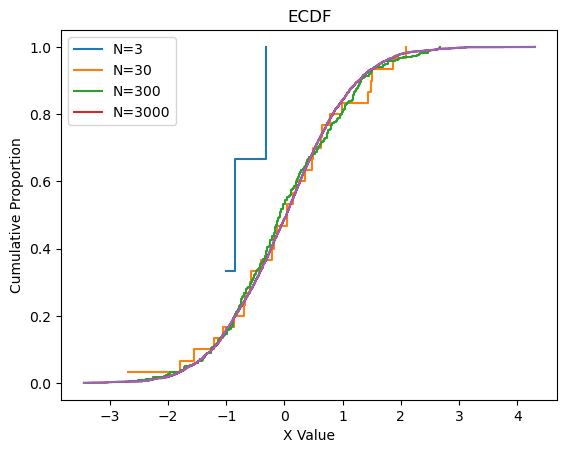

In [ ]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

def ecdf(data):
    sorted_data = np.sort(data)

    n = len(sorted_data)
    y = np.arange(1, n+1) / n

    return sorted_data, y

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    # ECDF plot goes here:

for N in (3, 30, 300, 3000):
    X = rng.normal(0,1,N)
    x, y = ecdf(X)
    plt.step(x, y, where="post", label=f"N={N}")

plt.plot(x, y)
plt.xlabel('X Value')
plt.ylabel('Cumulative Proportion')
plt.title('ECDF')
plt.legend()
plt.show()


The ECDF plot line becomes smoother and coverges toward the true CDF as N approaches infinite.


4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`.

In [ ]:
# quantile function

def quantile(data, Q):

    sorted_data = np.sort(data)     # Sort the data
    n = len(sorted_data)

    r = Q * (n - 1)                 # compute the rank position (1-based)

    if r.is_integer():              # If r is an integer, pick that data point
        return sorted_data[int(r)]
    else:                           # If r not an integer, interpolate between two nearest values
        return sorted_data[int(np.floor(r))] + (r - np.floor(r)) * (sorted_data[int(np.ceil(r))] - sorted_data[int(np.floor(r))])

#data = [7, 3, 5, 9]               # test data
#print(quantile(data, 0.75))


7.5


In [ ]:
# Interquartile Range (IQR) function

def IQR(data):
    q1 = quantile(data, 0.25)               # same as np.quantile(data, 0.25)
    q3 = quantile(data, 0.75)               # same as np.quantile(data, 0.75)
    iqr = q3 - q1

    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    return {
        "IQR": float(iqr),
        "lower_whisker": float(lower_whisker),
        "upper_whisker": float(upper_whisker)  }

#IQR(data)      #test function

In [ ]:
# Five-number summary with whiskers for boxplot function

def fiveN_plus_whiskers(data):
    q1 = quantile(data, 0.25)
    q2 = quantile(data, 0.5)
    q3 = quantile(data, 0.75)
    iqr = q3 - q1

    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    return {
        "min": float(min(data)),
        "Q1": float(q1),
        "median": float(q2),
        "Q3": float(q3),
        "max": float(max(data)),
        "lower_whisker": float(lower_whisker),
        "upper_whisker": float(upper_whisker)}

#fiveN_plus_whiskers(data)

In [ ]:
# Outliers function

def outliers(data):
    q1 = quantile(data, 0.25)
    q2 = quantile(data, 0.5)
    q3 = quantile(data, 0.75)
    iqr = q3 - q1

    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    return np.array([x < lower_whisker or x > upper_whisker for x in data])  #True if outlier, False otherwise

#print(outliers(data))

In [ ]:
# applying my function to topresults from Iowa CSV

fiveN_plus_whiskers(topresults)


{'min': 1281141823.39,
 'Q1': 1649564445.1949992,
 'median': 2641757246.729999,
 'Q3': 6834425441.219999,
 'max': 15252684245.64,
 'lower_whisker': -6127727048.842501,
 'upper_whisker': 14611716935.2575}

count    1.000000e+01
mean     5.454256e+09
std      5.424322e+09
min      1.281142e+09
25%      1.649564e+09
50%      2.641757e+09
75%      6.834425e+09
max      1.525268e+10
dtype: float64


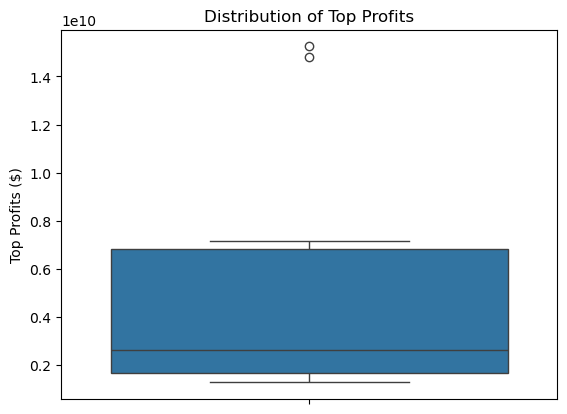

In [ ]:
ax = sns.boxplot(data=topresults)
ax.set_ylabel("Top Profits ($)")
ax.set_title("Distribution of Top Profits")

print(topresults.describe())

Compared with my functions, df.describe() produces the same min, max, Q1, Q2, and Q3 (only formatted differently with the scientific notation).

For sns.boxplot, the plot initially looks off because the whiskers visually do not match my function's calculations. However, I discovered (asked Chat) that the whiskers appear short because boxplots only show the last actual data points inside the allowable range. Therefore, the lower and upper whiskers align to the min and the max values.

    Since the data are all positive, there are no observations below 0, so the actual lower whisker in the plot is the minimum value (≈ 1.28 × 10⁹).
    
    The max (1.525 × 10¹⁰) is above the 1.461 × 10¹⁰ cutoff, so it gets drawn as an outlier point (in this case with another flier, which corresponds to the top profitting American vodkas and Canadian whiskies depicted in the earlier question). The whisker stops at the largest value <= 1.461 × 10¹⁰ cutoff.


5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

Completed 4 of 5 questions [I will try later, running out of time now!]